## EDA

Please put `anxiety_disorder_admission_data.csv` into the Data folder to ensure notebook runs correctly

In [1]:
# Exploratory Data Analysis: Hospital Readmission Predictors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load the data
df = pd.read_csv('Data/anxiety_disorder_admission_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns ({len(df.columns)}):")
print(df.columns.tolist())


Dataset shape: (86385, 50)
Columns (50):
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'baseline_anxiety_score', 'followup_anxiety_score', 'sertraline', 'escitalopram', 'fluoxetine', 'paroxetine', 'venlafaxine', 'duloxetine', 'buspirone', 'clonazepam', 'alprazolam', 'lorazepam', 'diazepam', 'hydroxyzine', 'propranolol', 'pregabalin', 'gabapentin', 'trazodone', 'mirtazapine', 'psychotherapy', 'sertraline-buspirone', 'escitalopram-clonazepam', 'venlafaxine-lorazepam', 'sertraline-diazepam', 'sertraline-lorazepam', 'change', 'anxiety_disorder', 'readmitted']


### Basic Data Information

In [2]:
print(f"Dataset dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Data types:")
print(df.dtypes.value_counts())
print(f"First few rows:")
df.head()


Dataset dimensions: 86,385 rows × 50 columns
Data types:
object    37
int64     13
Name: count, dtype: int64
First few rows:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,mirtazapine,psychotherapy,sertraline-buspirone,escitalopram-clonazepam,venlafaxine-lorazepam,sertraline-diazepam,sertraline-lorazepam,change,anxiety_disorder,readmitted
0,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
1,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30


### Missing Data Analysis

Columns with missing data:
                   Column  Missing_Count  Missing_Percent
1                  weight          83685        96.874457
7  baseline_anxiety_score          81843        94.742143
8  followup_anxiety_score          71987        83.332755
3       medical_specialty          42451        49.141633
2              payer_code          34232        39.627250
0                    race           1917         2.219135
6                  diag_3           1206         1.396076
5                  diag_2            297         0.343810
4                  diag_1             17         0.019679


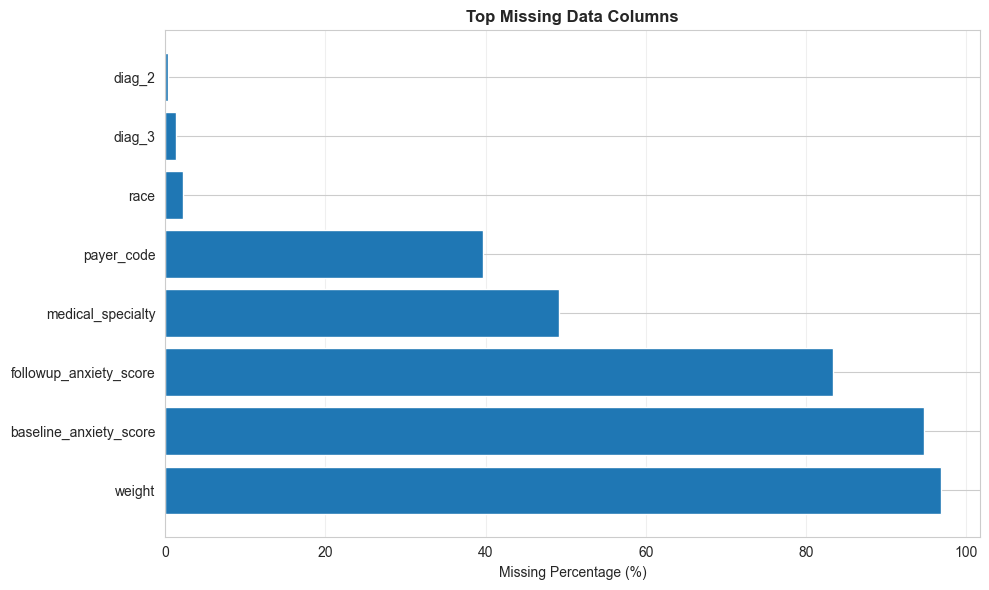

In [3]:
# Calculate missing values (including NaN, '?', and 'None' string values)
missing_data = []
for col in df.columns:
    nan_count = df[col].isnull().sum()
    qm_count = (df[col] == '?').sum() if df[col].dtype == 'object' else 0
    none_count = (df[col] == 'None').sum() if df[col].dtype == 'object' else 0
    total_missing = nan_count + qm_count + none_count
    if total_missing > 0:
        missing_data.append({
            'Column': col,
            'Missing_Count': total_missing,
            'Missing_Percent': (total_missing / len(df)) * 100
        })

missing_df = pd.DataFrame(missing_data).sort_values('Missing_Percent', ascending=False)
print("Columns with missing data:")
print(missing_df.head(10))

# Visualize top missing columns
if len(missing_df) > 0:
    top_missing = missing_df.head(8)
    plt.figure(figsize=(10, 6))
    plt.barh(top_missing['Column'], top_missing['Missing_Percent'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top Missing Data Columns', fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


### Target Variable, Readmissions

Readmission value counts:
readmitted
NO     46614
>30    30165
<30     9606
Name: count, dtype: int64

Percentages:
readmitted
NO     53.960757
>30    34.919257
<30    11.119986
Name: proportion, dtype: float64

Overall Readmission Rate: 46.04%
   - Early readmission (<30 days): 9,606 (11.12%)
   - Late readmission (>30 days): 30,165 (34.92%)
   - No readmission: 46,614 (53.96%)


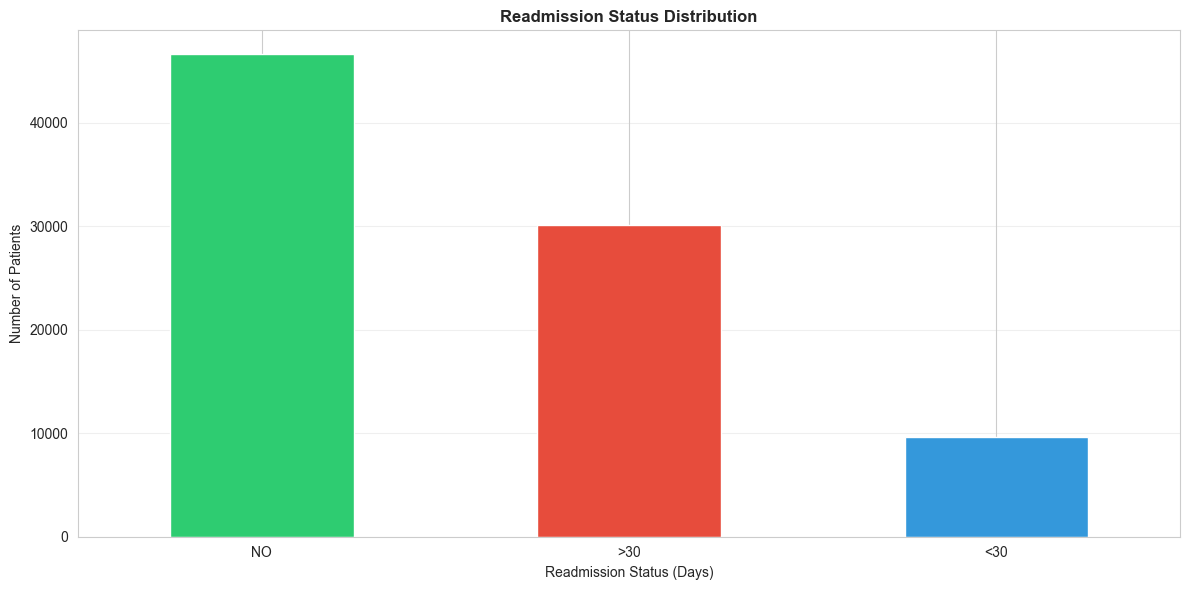

In [4]:
print("Readmission value counts:")
readmission_counts = df['readmitted'].value_counts()
print(readmission_counts)
print()
print(f"Percentages:")
print(df['readmitted'].value_counts(normalize=True) * 100)


# Calculate readmission rate
readmission_rate = ((df['readmitted'] != 'NO').sum() / len(df)) * 100
print()
print(f"Overall Readmission Rate: {readmission_rate:.2f}%")
print(f"   - Early readmission (<30 days): {(df['readmitted'] == '<30').sum():,} ({((df['readmitted'] == '<30').sum() / len(df)) * 100:.2f}%)")
print(f"   - Late readmission (>30 days): {(df['readmitted'] == '>30').sum():,} ({((df['readmitted'] == '>30').sum() / len(df)) * 100:.2f}%)")
print(f"   - No readmission: {(df['readmitted'] == 'NO').sum():,} ({((df['readmitted'] == 'NO').sum() / len(df)) * 100:.2f}%)")

# Visualize readmission distribution
readmission_counts.plot(kind='bar', color=['#2ecc71', '#e74c3c', '#3498db'])
plt.title('Readmission Status Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Readmission Status (Days)')
plt.ylabel('Number of Patients')
plt.tick_params(axis='x', rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### Demographics

Race Distribution:
race
Caucasian          64591
AfricanAmerican    16289
?                   1917
Hispanic            1734
Other               1305
Asian                549
Name: count, dtype: int64

Gender Distribution:
gender
Female             46578
Male               39804
Unknown/Invalid        3
Name: count, dtype: int64

Age Distribution:
age
[0-10)        136
[10-20)       584
[20-30)      1364
[30-40)      3184
[40-50)      8314
[50-60)     14542
[60-70)     18994
[70-80)     22196
[80-90)     14648
[90-100)     2423
Name: count, dtype: int64

Readmission Rate by Race:
race
Caucasian          46.816120
AfricanAmerican    45.846891
Hispanic           42.502884
Other              39.923372
Asian              36.065574
?                  31.716223
Name: readmitted, dtype: float64

Readmission Rate by Gender:
gender
Female             46.755979
Male               45.204000
Unknown/Invalid     0.000000
Name: readmitted, dtype: float64

Readmission Rate by Age Group:
age
[0-10)    

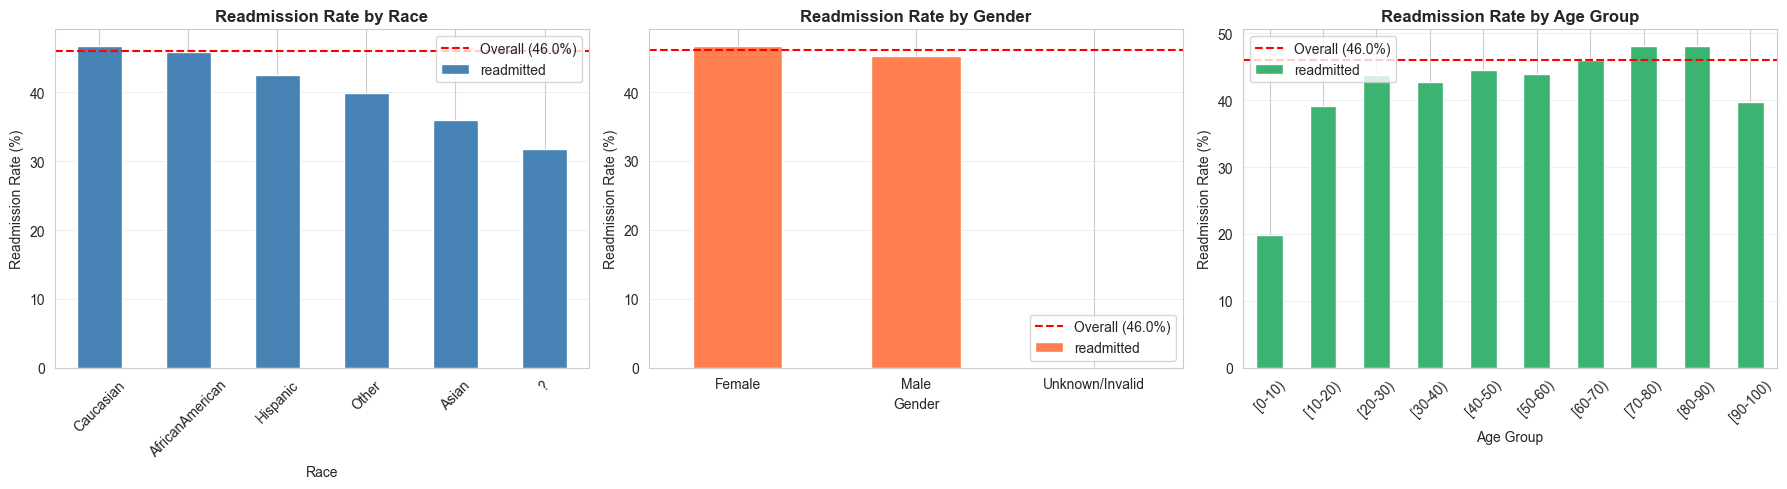

In [5]:
# Demographics overview
print("Race Distribution:")
print(df['race'].value_counts())
print()
print(f"Gender Distribution:")
print(df['gender'].value_counts())
print()
print(f"Age Distribution:")
print(df['age'].value_counts().sort_index())

# Calculate readmission rates by demographics
race_readmit = df.groupby('race')['readmitted'].apply(lambda x: (x != 'NO').sum() / len(x) * 100).sort_values(ascending=False)
gender_readmit = df.groupby('gender')['readmitted'].apply(lambda x: (x != 'NO').sum() / len(x) * 100).sort_values(ascending=False)
age_readmit = df.groupby('age')['readmitted'].apply(lambda x: (x != 'NO').sum() / len(x) * 100).sort_index()

print()
print("Readmission Rate by Race:")
print(race_readmit)
print()
print("Readmission Rate by Gender:")
print(gender_readmit)
print()
print("Readmission Rate by Age Group:")
print(age_readmit)

# Visualize readmission rates by demographics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

race_readmit.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Readmission Rate by Race', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Readmission Rate (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=readmission_rate, color='r', linestyle='--', label=f'Overall ({readmission_rate:.1f}%)')
axes[0].legend()

gender_readmit.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Readmission Rate by Gender', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Readmission Rate (%)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=readmission_rate, color='r', linestyle='--', label=f'Overall ({readmission_rate:.1f}%)')
axes[1].legend()

age_readmit.plot(kind='bar', ax=axes[2], color='mediumseagreen')
axes[2].set_title('Readmission Rate by Age Group', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Readmission Rate (%)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)
axes[2].axhline(y=readmission_rate, color='r', linestyle='--', label=f'Overall ({readmission_rate:.1f}%)')
axes[2].legend()

plt.tight_layout()
plt.show()


### Clinical related variables

In [6]:
# Select numeric clinical variables
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                'num_medications', 'number_outpatient', 'number_emergency', 
                'number_inpatient', 'number_diagnoses']

print("Summary Statistics for Clinical Variables:")
print(df[numeric_cols].describe())


Summary Statistics for Clinical Variables:
       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      86385.000000        86385.000000    86385.000000     86385.000000   
mean           4.398541           43.082642        1.337373        16.014343   
std            2.987873           19.702954        1.703605         8.123132   
min            1.000000            1.000000        0.000000         1.000000   
25%            2.000000           31.000000        0.000000        10.000000   
50%            4.000000           44.000000        1.000000        15.000000   
75%            6.000000           57.000000        2.000000        20.000000   
max           14.000000          132.000000        6.000000        81.000000   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
count       86385.000000      86385.000000      86385.000000      86385.000000  
mean            0.367541          0.200741          0.635261          7.42

Top 5 Medications by Prescription Rate:
       Medication  Prescribed_Percent
17  psychotherapy           53.504659
0      sertraline           19.650402
6       buspirone           12.446605
7      clonazepam           10.475198
9       lorazepam            7.177172

Treatment Changes:
change
No    46462
Ch    39923
Name: count, dtype: int64
change
No    53.784801
Ch    46.215199
Name: proportion, dtype: float64


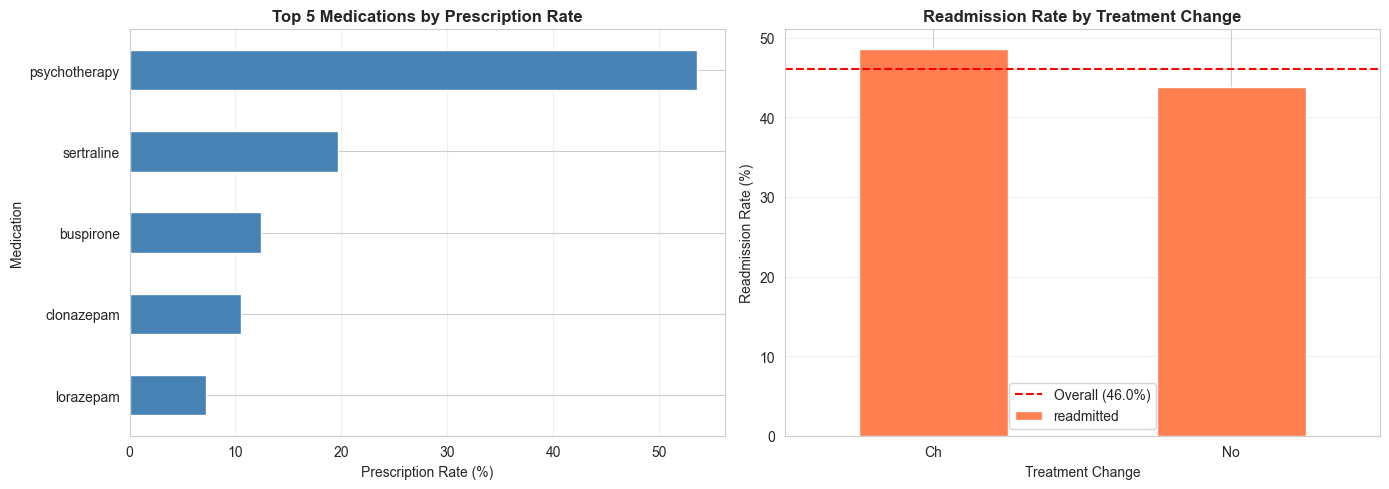

In [7]:
### Medications and Treatment

medication_cols = ['sertraline', 'escitalopram', 'fluoxetine', 'paroxetine', 'venlafaxine', 
                   'duloxetine', 'buspirone', 'clonazepam', 'alprazolam', 'lorazepam', 
                   'diazepam', 'hydroxyzine', 'propranolol', 'pregabalin', 'gabapentin', 
                   'trazodone', 'mirtazapine', 'psychotherapy']

# Top medications by prescription rate
medication_stats = {}
for med in medication_cols:
    if med in df.columns:
        prescribed = (df[med] != 'No').sum()
        medication_stats[med] = (prescribed / len(df)) * 100

med_df = pd.DataFrame(list(medication_stats.items()), columns=['Medication', 'Prescribed_Percent']).sort_values('Prescribed_Percent', ascending=False)
print("Top 5 Medications by Prescription Rate:")
print(med_df.head(5))

# Change in treatment
print("\nTreatment Changes:")
print(df['change'].value_counts())
print(df['change'].value_counts(normalize=True) * 100)

# Create any_psych_med feature
available_med_cols = [col for col in medication_cols if col in df.columns]
df['any_psych_med'] = df[available_med_cols].apply(lambda row: 'Yes' if any(row[col] != 'No' for col in available_med_cols) else 'No', axis=1)

# Visualize key medication insights
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top 5 medications
med_df.head(5).plot(kind='barh', x='Medication', y='Prescribed_Percent', ax=axes[0], color='steelblue', legend=False)
axes[0].set_title('Top 5 Medications by Prescription Rate', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Prescription Rate (%)')
axes[0].set_ylabel('Medication')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Treatment change vs readmission
change_readmit_rates = df.groupby('change')['readmitted'].apply(lambda x: (x != 'NO').sum() / len(x) * 100)
change_readmit_rates.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Readmission Rate by Treatment Change', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Treatment Change')
axes[1].set_ylabel('Readmission Rate (%)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=readmission_rate, color='r', linestyle='--', label=f'Overall ({readmission_rate:.1f}%)')
axes[1].legend()

plt.tight_layout()
plt.show()


### Admission and Discharges

In [8]:
# Admission and discharge overview
print("Top Admission Types:")
print(df['admission_type_id'].value_counts().head(5))
print()
print("Top Discharge Dispositions:")
print(df['discharge_disposition_id'].value_counts().head(5))

# Readmission by admission type (top 3)
admit_type_readmit = df.groupby('admission_type_id')['readmitted'].apply(
    lambda x: (x != 'NO').sum() / len(x) * 100
).sort_values(ascending=False).head(3)
print()
print("Readmission Rate by Top Admission Types:")
print(admit_type_readmit)


Top Admission Types:
admission_type_id
1    45799
3    16012
2    15747
6     4433
5     4097
Name: count, dtype: int64

Top Discharge Dispositions:
discharge_disposition_id
1     51033
3     11900
6     11003
18     3167
2      1786
Name: count, dtype: int64

Readmission Rate by Top Admission Types:
admission_type_id
6    53.485224
1    47.064346
5    46.717110
Name: readmitted, dtype: float64


### Visit History

Visit History Summary:
Patients with 0 total visits: 54.86%
Readmission rate for 0 visits: 36.12%
Readmission rate for 1+ visits: 58.10%
Readmission rate for 3+ visits: 67.50%


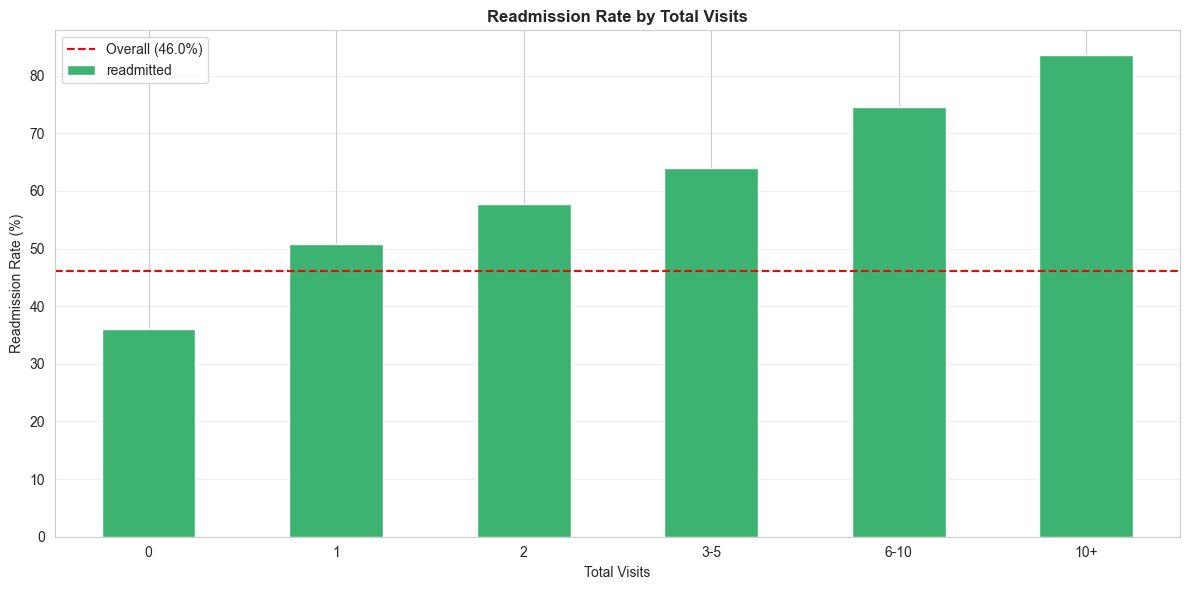

In [9]:
visit_cols = ['number_outpatient', 'number_emergency', 'number_inpatient']

# Create total visits feature
df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

print("Visit History Summary:")
print(f"Patients with 0 total visits: {((df['total_visits'] == 0).sum() / len(df) * 100):.2f}%")
print(f"Readmission rate for 0 visits: {(df[df['total_visits'] == 0]['readmitted'] != 'NO').sum() / len(df[df['total_visits'] == 0]) * 100:.2f}%")
print(f"Readmission rate for 1+ visits: {(df[df['total_visits'] > 0]['readmitted'] != 'NO').sum() / len(df[df['total_visits'] > 0]) * 100:.2f}%")
print(f"Readmission rate for 3+ visits: {(df[df['total_visits'] >= 3]['readmitted'] != 'NO').sum() / len(df[df['total_visits'] >= 3]) * 100:.2f}%")

# Visualize visit history impact
df['total_visits_binned'] = pd.cut(df['total_visits'], bins=[-1, 0, 1, 2, 5, 10, 100], 
                                    labels=['0', '1', '2', '3-5', '6-10', '10+'])
visits_readmit = df.groupby('total_visits_binned')['readmitted'].apply(
    lambda x: (x != 'NO').sum() / len(x) * 100
)

visits_readmit.plot(kind='bar', color='mediumseagreen')
plt.title('Readmission Rate by Total Visits', fontsize=12, fontweight='bold')
plt.xlabel('Total Visits')
plt.ylabel('Readmission Rate (%)')
plt.tick_params(axis='x', rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=readmission_rate, color='r', linestyle='--', label=f'Overall ({readmission_rate:.1f}%)')
plt.legend()
plt.tight_layout()
plt.show()


### Correlation Matrix

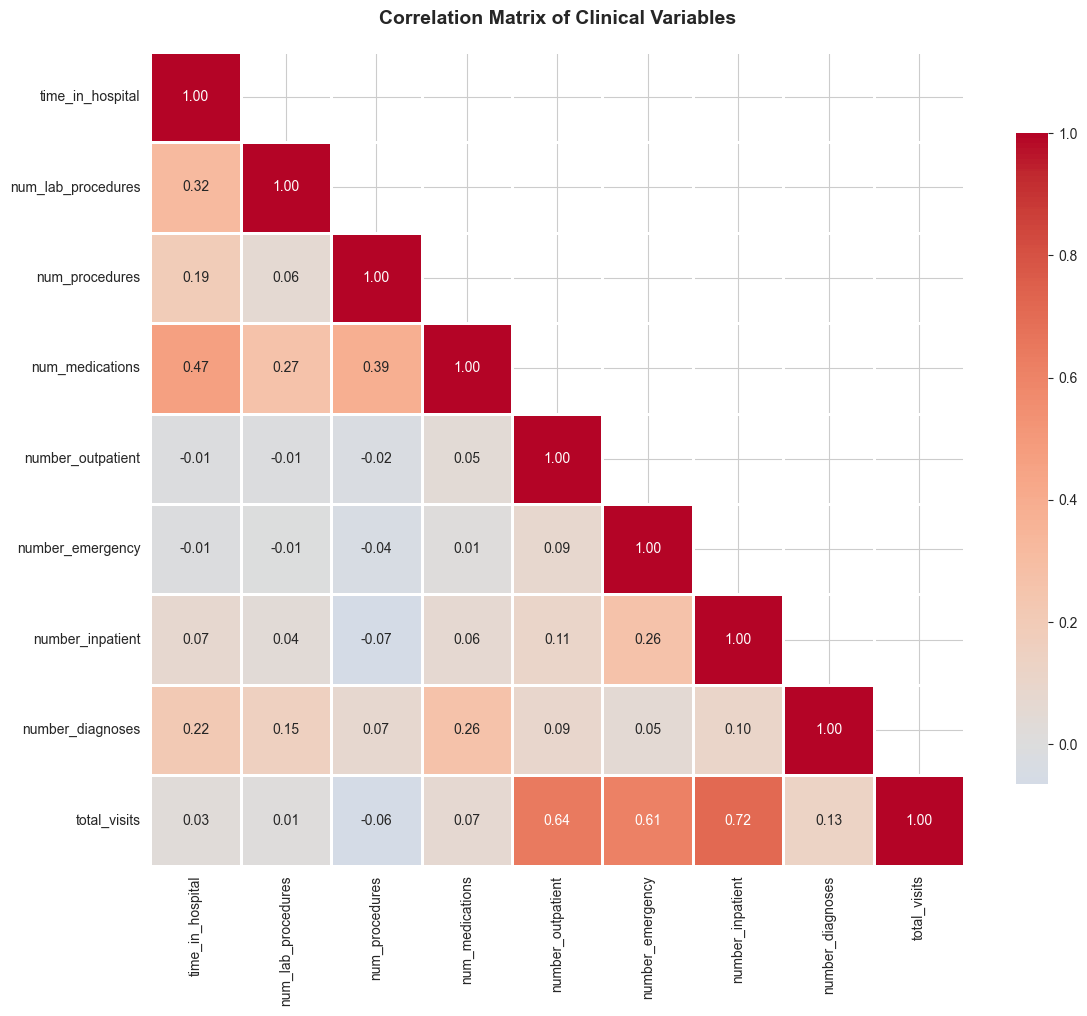

Top Correlations (>0.3):
number_inpatient ↔ total_visits: 0.715
number_outpatient ↔ total_visits: 0.643
number_emergency ↔ total_visits: 0.610
time_in_hospital ↔ num_medications: 0.466
num_procedures ↔ num_medications: 0.385
time_in_hospital ↔ num_lab_procedures: 0.319


In [10]:
# Calculate correlation matrix for numeric variables
correlation_cols = numeric_cols + ['total_visits']
corr_matrix = df[correlation_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, mask=mask)
plt.title('Correlation Matrix of Clinical Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highest correlations
print("Top Correlations (>0.3):")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
for col1, col2, corr in corr_pairs_sorted[:10]:
    print(f"{col1} ↔ {col2}: {corr:.3f}")


## KEY EDA INSIGHTS SUMMARY

In [11]:
### Data Quality Summary

print("Main Data Quality Issues:")
print("1. High missing data (>50%): weight (97%), baseline_anxiety_score (95%), followup_anxiety_score (83%)")
print("2. Placeholder values ('?'): medical_specialty (49%), payer_code (40%)")
print()
print("Recommendations:")
print("- Drop or create 'missing' category for columns with >50% missing")
print("- Convert '?' to NaN or treat as separate category")


Main Data Quality Issues:
1. High missing data (>50%): weight (97%), baseline_anxiety_score (95%), followup_anxiety_score (83%)
2. Placeholder values ('?'): medical_specialty (49%), payer_code (40%)

Recommendations:
- Drop or create 'missing' category for columns with >50% missing
- Convert '?' to NaN or treat as separate category


In [12]:
### Key Insights from EDA

print("Key Findings:")
print()
print(f"1. Overall readmission rate: {readmission_rate:.2f}%")
print(f"   - Early (<30 days): {((df['readmitted'] == '<30').sum() / len(df)) * 100:.2f}%")
print(f"   - Late (>30 days): {((df['readmitted'] == '>30').sum() / len(df)) * 100:.2f}%")

visit_0_rate = (df[df['total_visits'] == 0]['readmitted'] != 'NO').sum() / len(df[df['total_visits'] == 0]) * 100
visit_1plus_rate = (df[df['total_visits'] > 0]['readmitted'] != 'NO').sum() / len(df[df['total_visits'] > 0]) * 100
print()
print(f"2. Visit history is strongly associated with readmission:")
print(f"   - 0 visits: {visit_0_rate:.1f}% readmission rate")
print(f"   - 1+ visits: {visit_1plus_rate:.1f}% readmission rate")
print(f"   - Difference: {abs(visit_1plus_rate - visit_0_rate):.1f} percentage points")


change_yes_rate = (df[df['change'] == 'Ch']['readmitted'] != 'NO').sum() / len(df[df['change'] == 'Ch']) * 100
print()
print(f"3. Treatment changes: {change_yes_rate:.1f}% readmission rate vs no change: {(df[df['change'] == 'No']['readmitted'] != 'NO').sum() / len(df[df['change'] == 'No']) * 100:.1f}%")

print()
print(f"4. Clinical differences: Readmitted patients tend to have:")
print(f"   - Longer stays: {df[df['readmitted'] != 'NO']['time_in_hospital'].mean():.1f} vs {df[df['readmitted'] == 'NO']['time_in_hospital'].mean():.1f} days")
print(f"   - More medications: {df[df['readmitted'] != 'NO']['num_medications'].mean():.1f} vs {df[df['readmitted'] == 'NO']['num_medications'].mean():.1f}")
print(f"   - More diagnoses: {df[df['readmitted'] != 'NO']['number_diagnoses'].mean():.1f} vs {df[df['readmitted'] == 'NO']['number_diagnoses'].mean():.1f}")


Key Findings:

1. Overall readmission rate: 46.04%
   - Early (<30 days): 11.12%
   - Late (>30 days): 34.92%

2. Visit history is strongly associated with readmission:
   - 0 visits: 36.1% readmission rate
   - 1+ visits: 58.1% readmission rate
   - Difference: 22.0 percentage points

3. Treatment changes: 48.6% readmission rate vs no change: 43.8%

4. Clinical differences: Readmitted patients tend to have:
   - Longer stays: 4.6 vs 4.3 days
   - More medications: 16.4 vs 15.7
   - More diagnoses: 7.7 vs 7.2


In [13]:
print(f"Final dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")


Final dataset: 86,385 rows × 53 columns
